In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


# Environemnt -- WEATHER + TIDES

In [3]:
env_data_dr = "./data/"
ds_env = pd.read_csv(env_data_dr+"postprocessed_WeatherTide_digitaltwin_1h.csv")

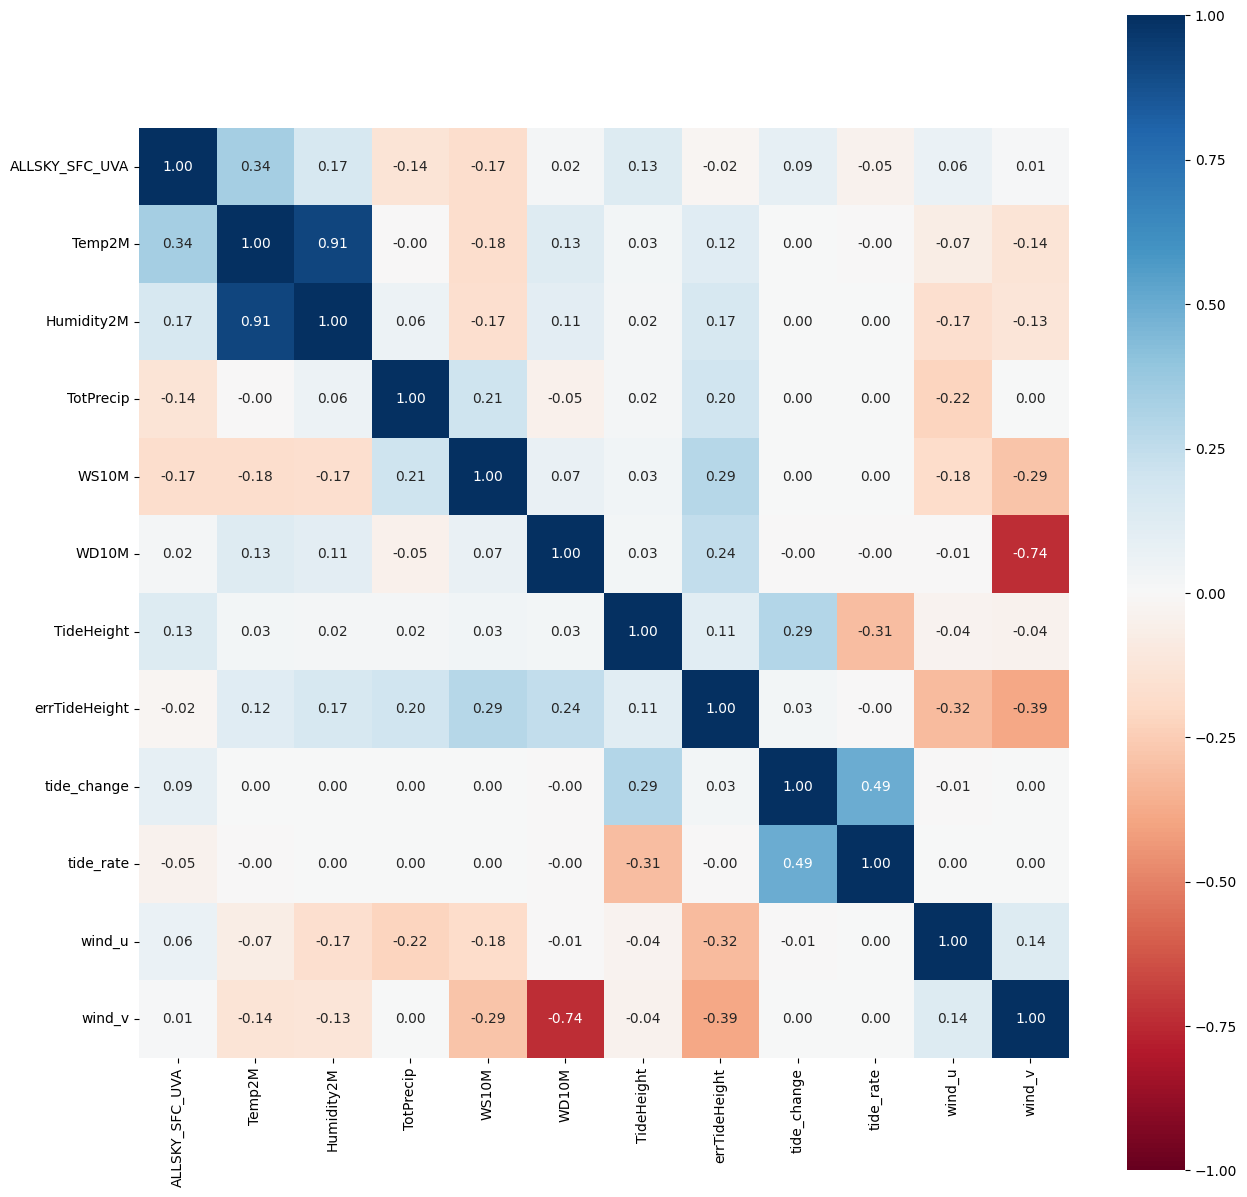

In [6]:
corrmat = ds_env[ds_env.select_dtypes(include=['float']).columns].corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

# Environment + Air Pollution

In [8]:
dir_UKAIR = "./data/UKAIR"
ds_air = pd.read_csv(dir_UKAIR+"AirQuality_post.csv")

/var/folders/3r/rtlnqdhs2252wkq2f4bdx2fc0000gn/T/ipykernel_17542/703619697.py:2: DtypeWarning: Columns (21,22,26,27,29,30,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_air = pd.read_csv(dir_UKAIR+"AirQuality_post.csv")


In [9]:
ds_air.columns

Index(['Unnamed: 0.1', 'Unnamed: 0',
       'PM10 particulate matter (Hourly measured)', 'status', 'unit',
       'Nitric oxide', 'status.1', 'unit.1', 'Nitrogen dioxide', 'status.2',
       'unit.2', 'Nitrogen oxides as nitrogen dioxide', 'status.3', 'unit.3',
       'Sulphur dioxide', 'status.4', 'unit.4', 'Carbon monoxide', 'status.5',
       'unit.5', 'Ozone', 'status.6', 'unit.6',
       'Non-volatile PM10 (Hourly measured)',
       'Non-volatile PM2.5 (Hourly measured)',
       'PM2.5 particulate matter (Hourly measured)', 'status.7', 'unit.7',
       'Volatile PM10 (Hourly measured)', 'status.8', 'unit.8',
       'Volatile PM2.5 (Hourly measured)', 'status.9', 'unit.9',
       'PM<sub>10</sub> particulate matter (Hourly measured)',
       'Non-volatile PM<sub>10</sub> (Hourly measured)',
       'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
       'PM<sub>2.5</sub> particulate matter (Hourly measured)',
       'Volatile PM<sub>10</sub> (Hourly measured)',
       'Volatile PM

In [10]:
ds_env.columns

Index(['Unnamed: 0', 'date', 'ALLSKY_SFC_UVA', 'Temp2M', 'Humidity2M',
       'TotPrecip', 'WS10M', 'WD10M', 'TideHeight', 'errTideHeight',
       'tide_change', 'tide_rate', 'tide_phase', 'wind_u', 'wind_v',
       'rain_since_dry'],
      dtype='object')

In [11]:
df_env_air = pd.merge(ds_env, ds_air, on="date", how="outer")

df_env_air = df_env_air.sort_values("date").reset_index(drop=True)

In [20]:
features_of_interest = [ 'Nitric oxide', 'Nitrogen dioxide', 'Carbon monoxide',\
                        'TotPrecip', 'WS10M', 'WD10M', 'wind_u', 'wind_v',
       ]

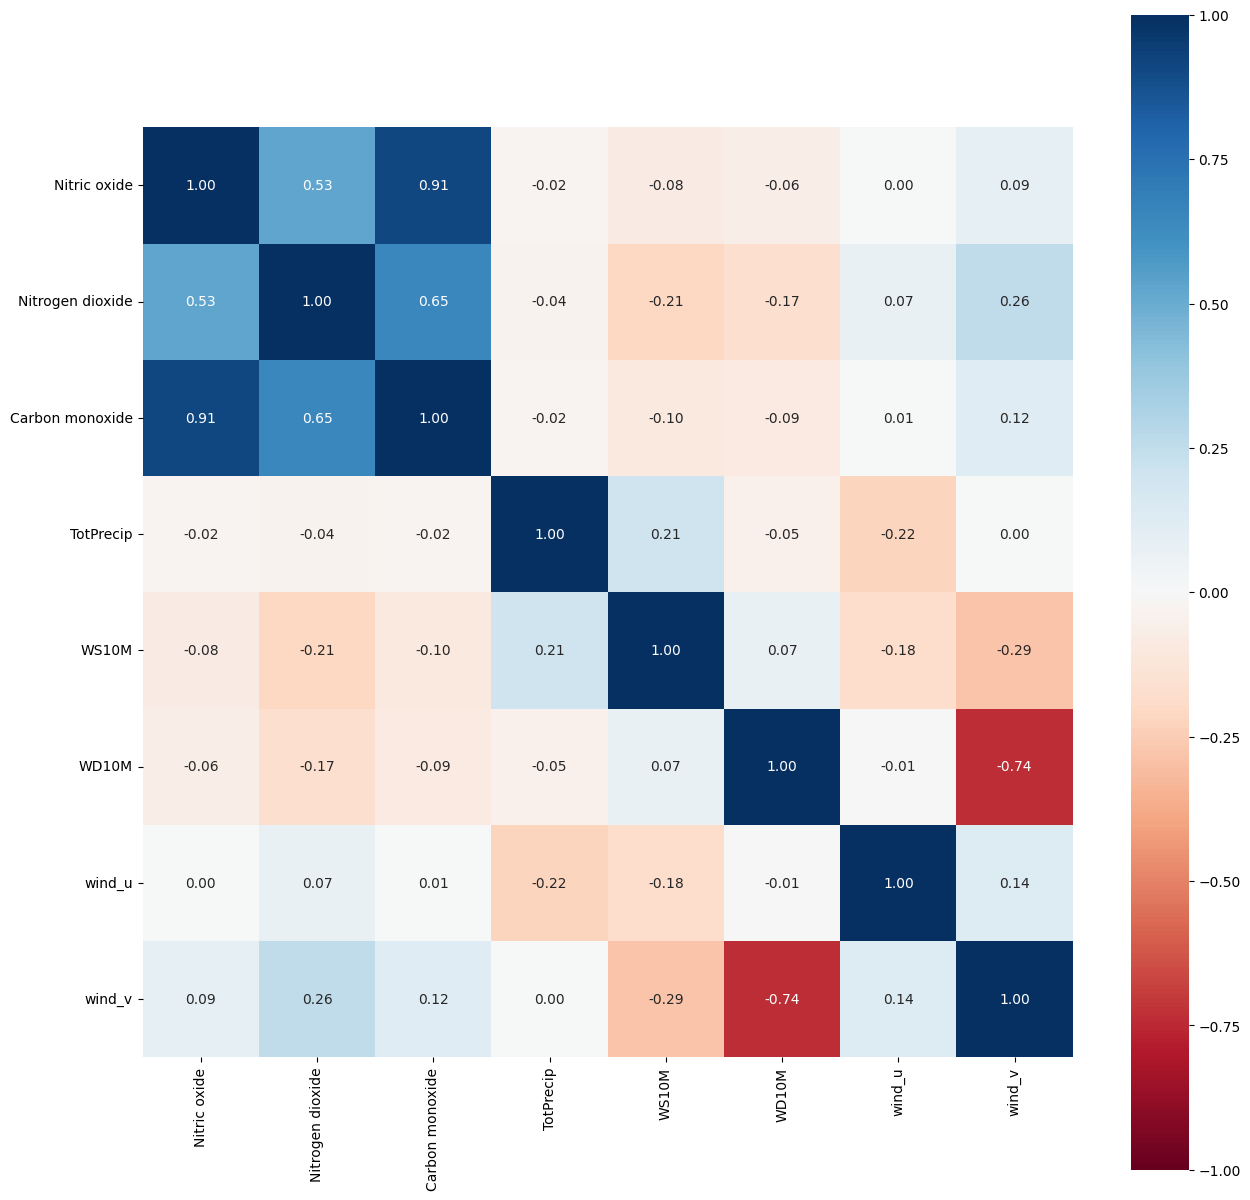

In [25]:
corrmat = df_env_air[features_of_interest].corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

In [26]:
def plot_timeseries(df, columns):
    colors = cm.rainbow(np.linspace(0, 1, len(columns)))

    fig, axes = plt.subplots(nrows=len(columns),ncols=1, sharex=True, figsize=(8,8))

    for i in range(len(columns)):
        axes[i].plot(pd.to_datetime(df["date"]).dt.date, df[columns[i]].astype(float), label=str(columns[i]),\
                    color=colors[i])
        xmin, xmax = axes[i].get_xlim()
        N=10
        axes[i].set_xticks(np.round(np.linspace(xmin, xmax, N)))


        axes[i].xaxis.set_tick_params(rotation=45)
    fig.legend(bbox_to_anchor=(1.15, .75))
    plt.xlabel("time")


    plt.show()

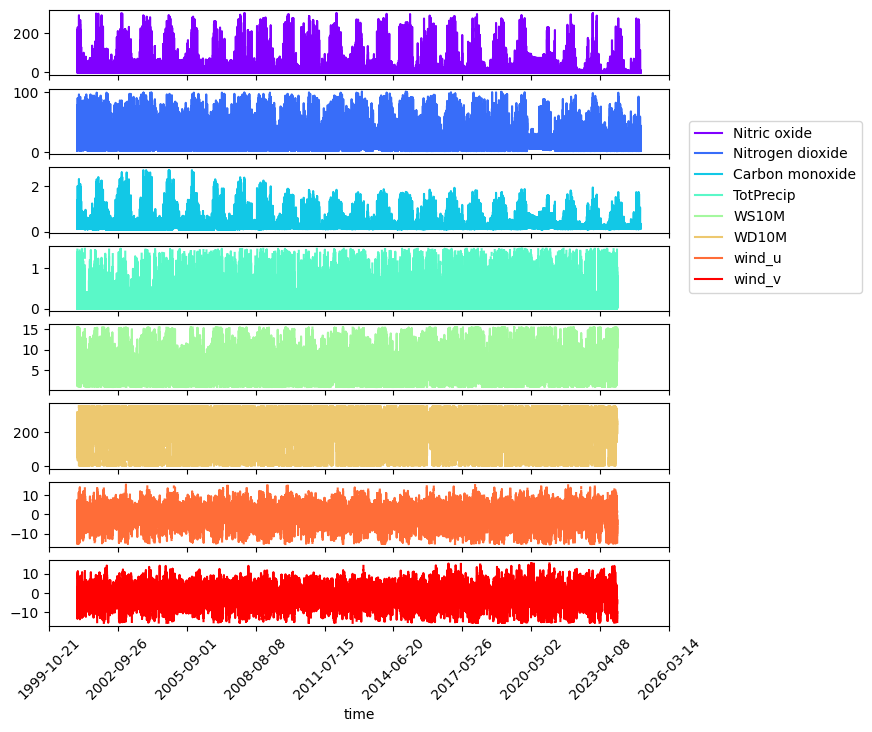

In [27]:
plot_timeseries(df_env_air, features_of_interest)

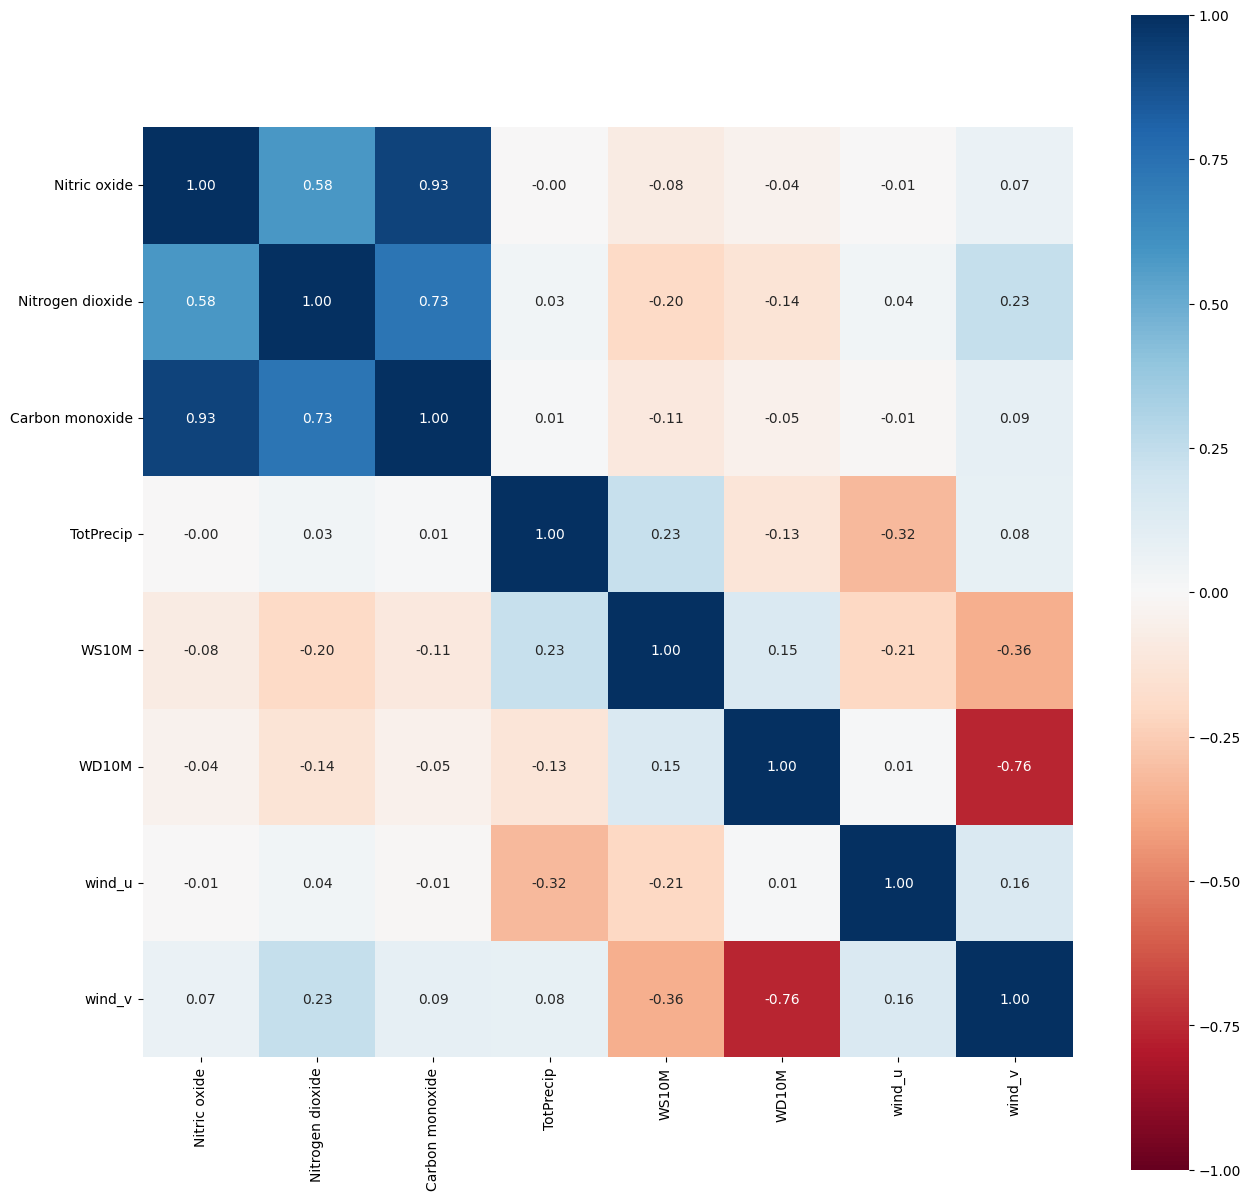

In [33]:
corrmat = df_env_air[pd.to_datetime(df_env_air.date).dt.year==2023][features_of_interest].corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

# Environment + Sediments 

In [35]:
dr_sediment = "../Sediment/data/"

In [37]:
ds_sedh = pd.read_csv(dr_sediment+"L8_sediment_hayling.csv")
ds_sed0 = pd.read_csv(dr_sediment+"L8_sediment_centre.csv")

In [ ]:
ds_env_day = ds_env[(pd.to_datetime(ds_env["date"]).dt.date.isin(pd.to_datetime(ds_sed0["date"]).dt.date))].groupby(pd.to_datetime(ds_env["date"]).dt.date).mean(numeric_only =True)
df_sed0_day = ds_sed0[(pd.to_datetime(ds_sed0["date"]).dt.date.isin(pd.to_datetime(ds_env["date"]).dt.date))]\
.groupby(pd.to_datetime(ds_sed0["date"]).dt.date).mean(numeric_only =True)
df_env_sed0 = pd.merge(ds_env_day, df_sed0_day.sort_values("date"), on="date", how="outer")

df_env_sed0 = df_env_sed0.sort_values("date").reset_index(drop=True)

In [56]:
ds_env_day = ds_env[(pd.to_datetime(ds_env["date"]).dt.date.isin(pd.to_datetime(ds_sedh["date"]).dt.date))].groupby(pd.to_datetime(ds_env["date"]).dt.date).mean(numeric_only =True)
df_sedh_day = ds_sedh[(pd.to_datetime(ds_sedh["date"]).dt.date.isin(pd.to_datetime(ds_env["date"]).dt.date))]\
.groupby(pd.to_datetime(ds_sedh["date"]).dt.date).mean(numeric_only =True)
df_env_sedh = pd.merge(ds_env_day, df_sedh_day.sort_values("date"), on="date", how="outer")

df_env_sedh = df_env_sedh.sort_values("date").reset_index(drop=True)

In [54]:
features_of_interest = ['ALLSKY_SFC_UVA', 'Temp2M', 'Humidity2M',
       'TotPrecip', 'WS10M', 'WD10M', 'TideHeight',
       'tide_change', 'tide_rate', 'wind_u', 'wind_v',
       'NSMI_tot', 
    'NSMI_med',
       'NSMI_totpix20', 'TSS_totpix20',
       'NSMI_totpix80', 'TSS_totpix80']

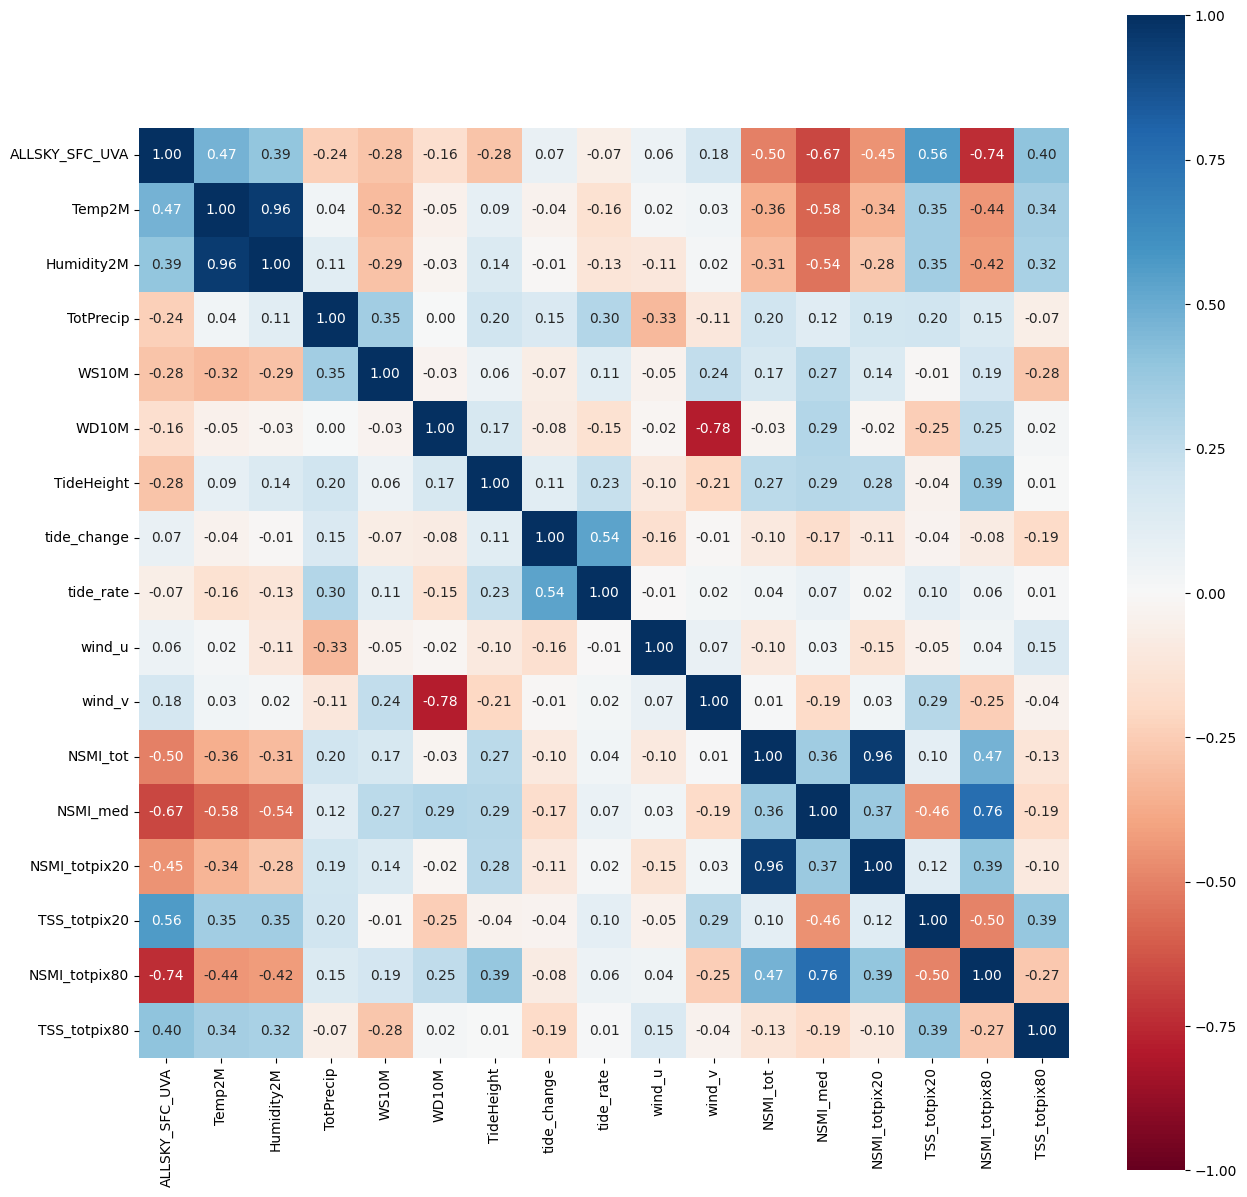

In [55]:
corrmat = df_env_sed0[features_of_interest].corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

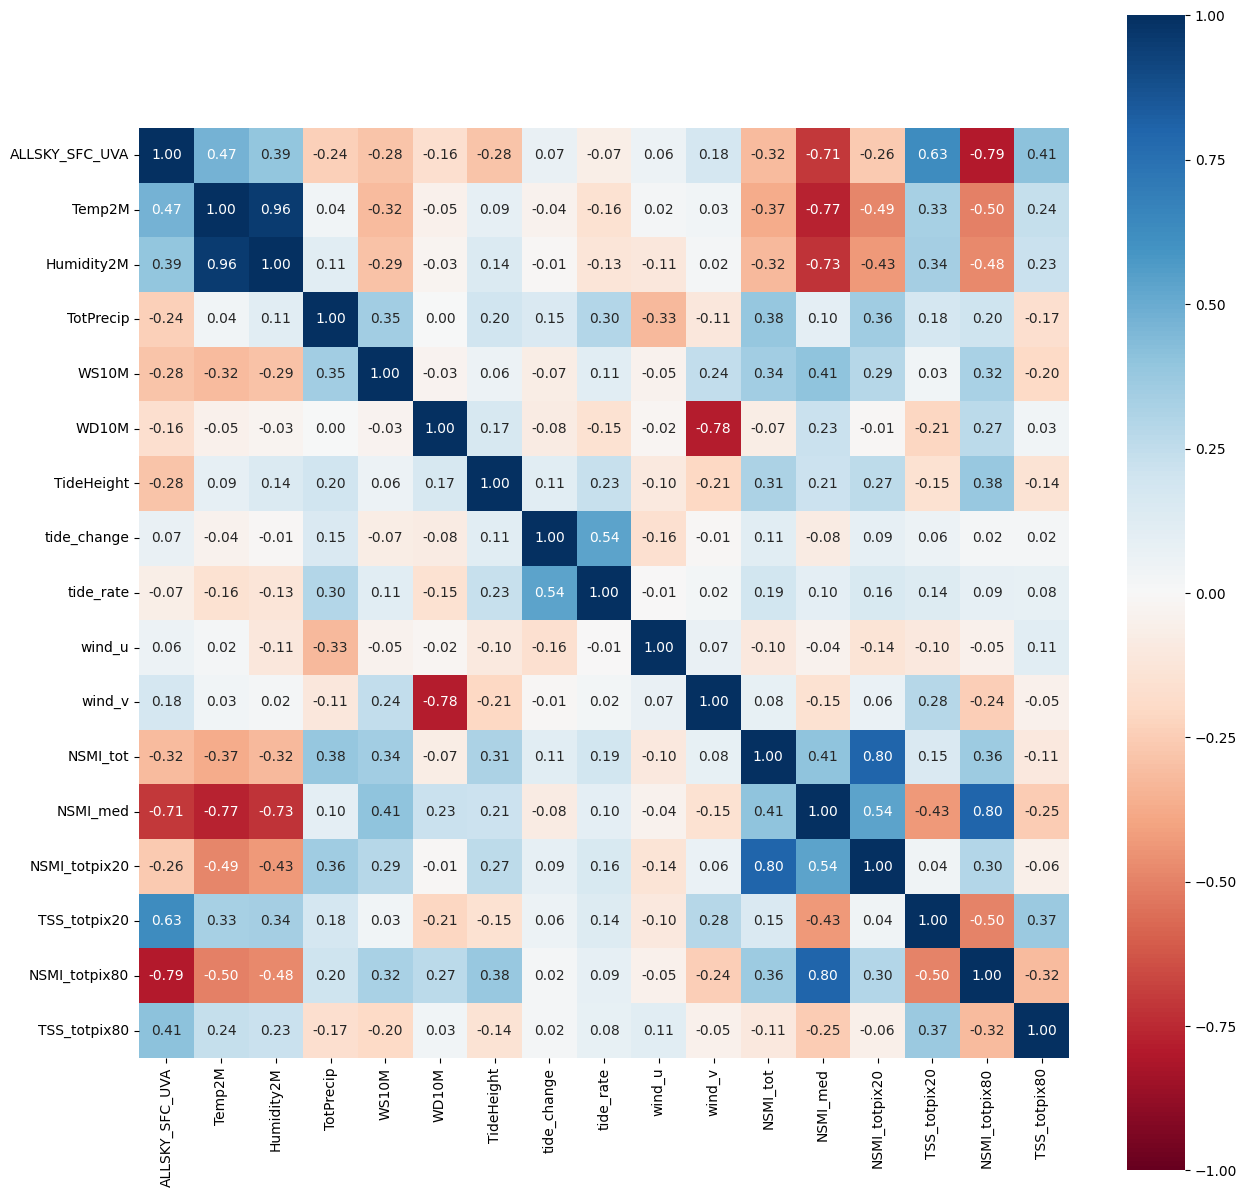

In [57]:
corrmat = df_env_sedh[features_of_interest].corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()